In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Read data from file
data_file = "/content/drive/MyDrive/HackStars code /merged_data__latest.xlsx"  # Replace with the actual file path
df = pd.read_excel(data_file)

In [ ]:
# Convert the DateTime column to datetime type
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Extract year, month, day, and hour into separate columns
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['Day'] = df['DateTime'].dt.day
df['Hour'] = df['DateTime'].dt.hour

new_column_order = ['DateTime', 'Year', 'Month', 'Day', 'Hour','Pressure | (atm)','Wind speed | (m/s)','Air temperature | (°C)','Power generated by system | (MW)']  # Define the new column order
df = df[new_column_order]  # Rearrange the columns

# Save the modified DataFrame back to the file
df.to_csv("modified_data.csv", index=False)  # Replace "modified_data.csv" with your desired file path

In [ ]:
df

,DateTime,Year,Month,Day,Hour,Pressure | (atm),Wind speed | (m/s),Air temperature | (°C),Power generated by system | (MW)
0,2019-01-01 01:00:00.000,2019,1,1,1,0.979103,9.014,10.926,33.6881
1,2019-01-01 02:00:00.000,2019,1,1,2,0.979566,9.428,9.919,37.2619
2,2019-01-01 03:00:00.005,2019,1,1,3,0.979937,8.700,8.567,30.5029
3,2019-01-01 04:00:00.010,2019,1,1,4,0.980053,8.481,7.877,28.4192
4,2019-01-01 05:00:00.015,2019,1,1,5,0.979867,8.383,7.259,27.3703
...,...,...,...,...,...,...,...,...,...
43818,2023-12-31 19:00:00.000,2023,12,31,19,0.985015,8.703,11.713,30.4221
43819,2023-12-31 20:00:00.000,2023,12,31,20,0.985244,8.854,12.115,32.0366
43820,2023-12-31 21:00:00.000,2023,12,31,21,0.985639,9.333,11.856,36.3990
43821,2023-12-31 22:00:00.000,2023,12,31,22,0.986212,9.457,10.761,37.7404


In [ ]:
# Read data from file
data_file = "/content/drive/MyDrive/HackStars code /merged_data__latest.xlsx"  # Replace with the actual file path
df = pd.read_excel(data_file)

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
import joblib


# Preprocessing
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%YYYY-%mm-%dd %HH:%MM:%SS')
df.set_index('DateTime', inplace=True)

# Function to create input and output sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length, :-1])
        y.append(data[i+seq_length, -1])
    return np.array(X), np.array(y)

# Set sequence length
sequence_length = 3  # You can adjust this as needed

# Create sequences
X, y = create_sequences(df.values, sequence_length)

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=100, activation='relu', return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(LSTM(units=50, activation='relu'))
model.add(Dense(units=1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train the model
model.fit(X, y, epochs=20, batch_size=32, validation_split=0.2)

# Now saving model
model_save_path = '/content/model.pkl'  # Path where you want to save the model
joblib.dump(model, model_save_path)

print(f"Model saved at: {model_save_path}")

Epoch 1/20
1096/1096 [==============================] - 14s 9ms/step - loss: 68.3636 - val_loss: 56.9492
Epoch 2/20
1096/1096 [==============================] - 9s 8ms/step - loss: 47.6151 - val_loss: 43.6481
Epoch 3/20
1096/1096 [==============================] - 11s 10ms/step - loss: 44.2247 - val_loss: 41.6005
Epoch 4/20
1096/1096 [==============================] - 11s 10ms/step - loss: 43.1279 - val_loss: 41.4607
Epoch 5/20
1096/1096 [==============================] - 9s 8ms/step - loss: 42.6377 - val_loss: 40.5846
Epoch 6/20
1096/1096 [==============================] - 11s 10ms/step - loss: 41.8859 - val_loss: 39.5903
Epoch 7/20
1096/1096 [==============================] - 10s 9ms/step - loss: 41.3893 - val_loss: 39.7444
Epoch 8/20
1096/1096 [==============================] - 9s 9ms/step - loss: 41.3063 - val_loss: 41.5721
Epoch 9/20
1096/1096 [==============================] - 11s 10ms/step - loss: 41.1457 - val_loss: 41.6034
Epoch 10/20
1096/1096 [==============================]

In [ ]:
predicted_values = model.predict(X)

# If needed, you can further process predicted_values_scaled here

# Inverse the transformation to get predicted values in original scale

1370/1370 [==============================] - 5s 3ms/step


In [ ]:
predicted_values

array([[29.505161],
       [28.451828],
       [28.490349],
       ...,
       [33.899975],
       [38.776524],
       [39.02774 ]], dtype=float32)

In [ ]:
validation_data = '/content/drive/MyDrive/HackStars code /wind_power_gen_3months_validation_data.xlsx'
df_validation = pd.read_excel(validation_data)

In [ ]:
# Assuming df_validation has the same structure as df (excluding the target column)

# Preprocessing for validation data
df_validation['DateTime'] = pd.to_datetime(df_validation['DateTime'], format='%YYYY-%mm-%dd %HH:%MM:%SS')
df_validation.set_index('DateTime', inplace=True)

# Create sequences for validation data
X_val, y_val = create_sequences(df_validation.values, sequence_length)


In [ ]:
# Predict using the model on the validation dataset
predicted_validation_output = model.predict(X_val)

69/69 [==============================] - 0s 5ms/step


In [ ]:
predicted_validation_output

array([[51.22557  ],
       [49.44247  ],
       [52.547703 ],
       ...,
       [13.0631275],
       [18.771915 ],
       [16.749697 ]], dtype=float32)

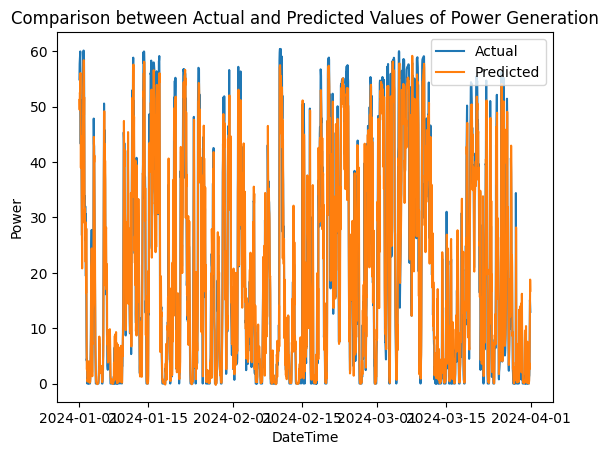

In [ ]:
import matplotlib.pyplot as plt

# Plot actual values
plt.plot(df_validation.index[sequence_length:], y_val, label='Actual')

# Plot predicted values
plt.plot(df_validation.index[sequence_length:], predicted_validation_output, label='Predicted')

plt.xlabel('DateTime')
plt.ylabel('Power')
plt.title('Comparison between Actual and Predicted Values of Power Generation')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Calculate RMSE
rmse = sqrt(mean_squared_error(y_val, predicted_validation_output))

print("RMSE:", rmse/100)

RMSE: 0.06701271617702502


In [ ]:
import pandas as pd

# Assuming df_validation has a DateTime index
# Create a DataFrame to store the predicted values
predicted_df = pd.DataFrame(predicted_validation_output, index=df_validation.index[sequence_length:], columns=['Power_predicted_values'])

# Save the DataFrame to a CSV file
predicted_df.to_csv('Power_predicted_values.csv')


In [ ]:
import pandas as pd

# Assuming df_validation has a DateTime index
# Create a DataFrame to store the predicted values
predicted_df_2 = pd.DataFrame(predicted_values, index=df.index[sequence_length:], columns=['Power_Training_Predicted_Values'])
predicted_df_2.to_csv("Power_Training_Predicted_Values.csv")